In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Default_Fin.csv")

In [3]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [4]:
df=df.dropna()

In [5]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [6]:
df["Defaulted?"].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [7]:
cor=df.corr()
cor

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
Index,1.000000,-0.002597,0.010342,-0.001427,-0.005135
Employed,-0.002597,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,0.010342,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,-0.001427,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.005135,-0.035420,0.350119,-0.019871,1.000000


<AxesSubplot:>

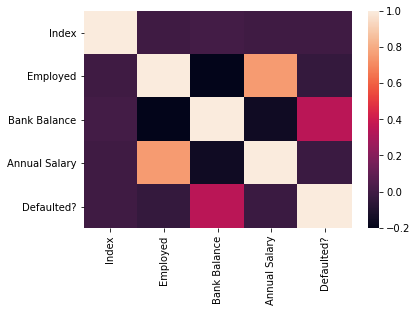

In [8]:
sns.heatmap(cor)

In [9]:
X = df.drop(['Defaulted?'], axis="columns")
Y = df["Defaulted?"]

In [10]:
x = df[["Employed", "Annual Salary","Bank Balance"]]
y=df["Defaulted?"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)

In [12]:
y_train

7681    0
9031    0
3691    0
202     0
5625    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    0
Name: Defaulted?, Length: 7000, dtype: int64

In [13]:
logi = LogisticRegression()

In [14]:
x_train=x_train.drop(["Index"],axis="columns")

In [15]:
log_reg=logi.fit(x_train , y_train)

In [22]:
x_test=x_test.drop(['Index'],axis=1)

In [23]:
y_true=log_reg.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_true)

0.962

In [27]:
cm=confusion_matrix(y_test,y_true)

In [28]:
cm

array([[2886,    1],
       [ 113,    0]], dtype=int64)